In [1]:
import cv2
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
labels = ['PNEUMONIA', 'NORMAL']
train_dir='chest_xray/chest_xray/train'
test_dir='chest_xray/chest_xray/test'
val_dir='chest_xray/chest_xray/val'


# Exploring the Images

In [12]:
path_pneumonia = os.path.join(train_dir, labels[0])
path_normal = os.path.join(train_dir, labels[1])

img_pneu= os.listdir(path_pneumonia)
img_nor= os.listdir(path_normal)
print(f'X-rays with pneumonia is {len(img_pneu)} and normal is {len(img_nor)}')
print(f'Total X-rays in Train dir is {len(img_pneu) + len(img_nor)}')

X-rays with pneumonia is 3876 and normal is 1342
Total X-rays in Train dir is 5218


In [13]:
path_pneumonia_test = os.path.join(test_dir, labels[0])
path_normal_test = os.path.join(test_dir, labels[1])

img_pneu_test= os.listdir(path_pneumonia_test)
img_nor_test= os.listdir(path_normal_test)
print(f'X-rays with pneumonia is {len(img_pneu_test)} and normal is {len(img_nor_test)}')
print(f'Total X-rays in Test dir is {len(img_pneu_test) + len(img_nor_test)}')

X-rays with pneumonia is 390 and normal is 234
Total X-rays in Test dir is 624


In [14]:
path_pneumonia_val = os.path.join(val_dir, labels[0])
path_normal_val = os.path.join(val_dir, labels[1])

img_pneu_val= os.listdir(path_pneumonia_val)
img_nor_val= os.listdir(path_normal_val)
print(f'X-rays with pneumonia is {len(img_pneu_val)} and normal is {len(img_nor_val)}')
print(f'Total X-rays in Val dir is {len(img_pneu_val) + len(img_nor_val)}')

X-rays with pneumonia is 9 and normal is 9
Total X-rays in Val dir is 18


In [ ]:
img_pneu= os.listdir(path_pneumonia)[0] #taking first image
img_nor= os.listdir(path_normal)[0] 

In [11]:
img_pneu_arr= cv2.imread(os.path.join(path_pneumonia, img_pneu))
img_pneu_arr.shape

(712, 992, 3)

In [12]:
'''Make Img director to save images'''
directory = './Img'
if not os.path.exists(directory):
        os.makedirs(directory)

Dimensions on single color channel: 1357 pixels width and 1828 pixels height.
Maximum pixel value is 255.0000 and the minimum is 0.0000


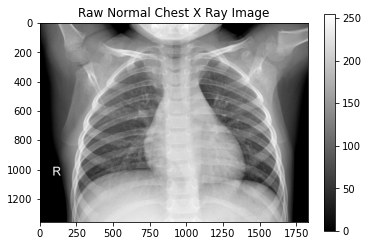

In [16]:
'''Plot Raw normal image'''
img_arr_nor= cv2.imread(os.path.join(path_normal, img_nor), cv2.IMREAD_GRAYSCALE)

plt.imshow(img_arr_nor, cmap='gray')
plt.colorbar()
plt.title('Raw Normal Chest X Ray Image')
plt.savefig('./Img/chest_Xray_normal_eg.png')

print(f"Dimensions on single color channel: {img_arr_nor.shape[0]} pixels width and {img_arr_nor.shape[1]} pixels height.")
print(f"Maximum pixel value is {img_arr_nor.max():.4f} and the minimum is {img_arr_nor.min():.4f}")


Dimensions on single color channel: 712 pixels width and 992 pixels height.
Maximum pixel value is 255.0000 and the minimum is 0.0000


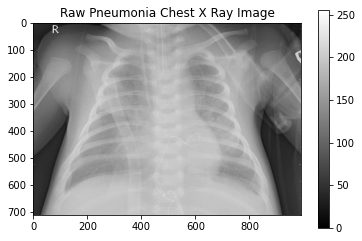

In [17]:
'''Plot Raw Pneumonia image'''
img_arr_pneu= cv2.imread(os.path.join(path_pneumonia, img_pneu), cv2.IMREAD_GRAYSCALE)
#
plt.imshow(img_arr_pneu, cmap='gray')
plt.colorbar()
plt.title('Raw Pneumonia Chest X Ray Image')
plt.savefig('./Img/chest_Xray_pneu_eg.png')

print(f"Dimensions on single color channel: {img_arr_pneu.shape[0]} pixels width and {img_arr_pneu.shape[1]} pixels height.")
print(f"Maximum pixel value is {img_arr_pneu.max():.4f} and the minimum is {img_arr_pneu.min():.4f}")


# Resize, Process, and Visualize the Processed Images 

In [18]:
img_size = 150
def read_image_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [19]:
train = read_image_data(train_dir)
test = read_image_data(test_dir)
val = read_image_data(val_dir)

OpenCV(4.5.1) ../modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.1) ../modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



<ipython-input-18-de06b3de9a2f>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(data)


OpenCV(4.5.1) ../modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.1) ../modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [20]:
idx= np.where(train[:,1]==0)
img_pneumonia=train[idx]
img_normal= train[np.where(train[:,1]==1)]

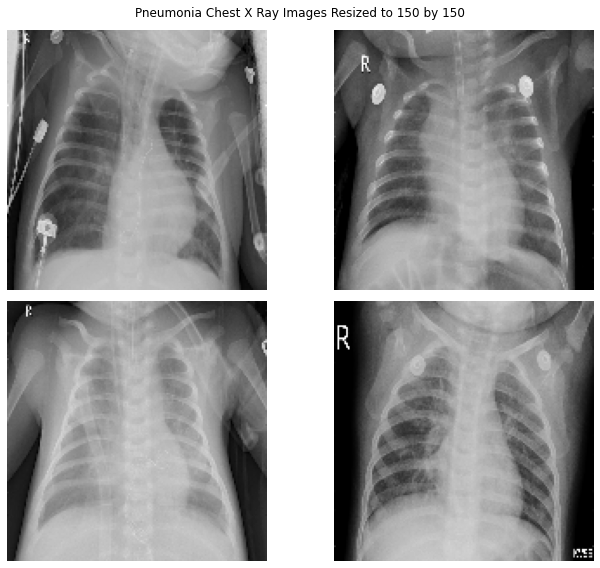

In [23]:
'''Plot images Pneumonia X-rays'''
plt.figure(figsize=(10, 8))
plt.suptitle('Pneumonia Chest X Ray Images Resized to 150 by 150')
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(img_pneumonia[i][0], cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.savefig('./Img/chest_Xray_pneu_resize.png')    



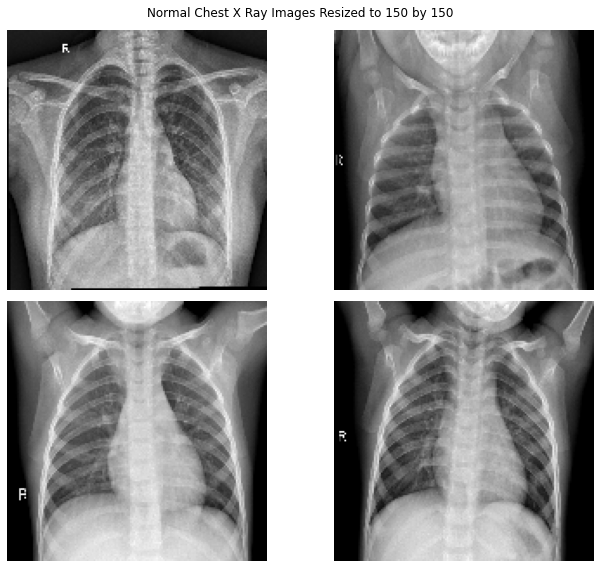

In [24]:
'''plot images for Normal X-rays'''
plt.figure(figsize=(10, 8))
plt.suptitle('Normal Chest X Ray Images Resized to 150 by 150')
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(img_normal[i][0], cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.savefig('./Img/chest_Xray_normal_resize.png')    

# Check for Data balance/imbalance

In [25]:
train_copy =train.copy()

In [26]:
'''Count number of images for Pneumonia and Normal'''
labels_all= train_copy[:,1]
total_train= len(labels_all)
num_pneu= len(labels_all[np.where(labels_all==0)])
num_nor= len(labels_all[np.where(labels_all==1)])

print(f"Total training images={total_train}")
print(f"pneumonia={num_pneu}")
print(f"normal={num_nor}")

Total training images=5216
pneumonia=3875
normal=1341


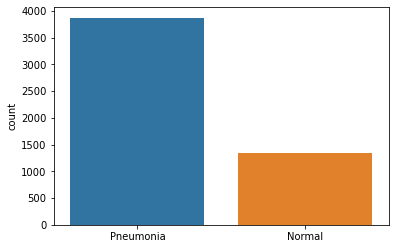

In [28]:
'''Count number of images for Pneumonia and Normal'''
labels_all_copy= labels_all.copy()
labels_all_copy[np.where(labels_all_copy==0)]='Pneumonia' #renaming 0 to Pneumonia
labels_all_copy[np.where(labels_all_copy==1)]='Normal' #renaming 1 to Normal
sns_plot=sns.countplot(labels_all_copy)  
plt.savefig("./Img/chest_Xray_class_labels.png")

### This shows the training data is imbalanced. In such case, using normal loss function will result a model that bias towards the dominating class. One way to address this issue is to use a wieghted loss function that balances the contribution of each class in the loss function. Also, training will be carried out using data augmentation feature in Keras which will increase the training data sets. Also, the evaluation metrics will be taken as the 'accuracy' and 'F1 score'.

In [30]:
'''calculating class weights''' 

weight_0 = num_pneu / total_train
weight_1 = num_nor / total_train

class_weight = {0: weight_0, 1: weight_1}

print(f"Weight for Pneumonia (Class 0): {weight_0:.2f}")
print(f"Weight for Normal (Class 1:) {weight_1:.2f}")

Weight for Pneumonia (Class 0): 0.74
Weight for Normal (Class 1:) 0.26


# Data Preprocessing and Data Augmentation 
   ### Rescale the data 
   ### Randomly rotate images by 20 degrees
   ### Randomly zoom by 10%
   ### Randomly shift the width by 10%


In [31]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    samplewise_center=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Build generators for train/validation/test

In [32]:
img_size=150

train_generator = train_datagen.flow_from_directory(train_dir, 
                                            batch_size=8, 
                                            shuffle=True, 
                                            class_mode='binary',
                                            target_size=(img_size, img_size))

validation_generator = test_datagen.flow_from_directory(val_dir, 
                                                batch_size=1, 
                                                shuffle=True, 
                                                class_mode='binary',
                                                target_size=(img_size, img_size))

test_generator = test_datagen.flow_from_directory(test_dir, 
                                            batch_size=1, 
                                            shuffle=False, 
                                            class_mode='binary',
                                            target_size=(img_size, img_size))


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [33]:
len(test_generator.classes)
#train_dir

624

# Part I: CNN Base Model 

### I. Define Model

In [84]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization
from keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(img_size, img_size, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(img_size, img_size, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

adam_opt = Adam(learning_rate=0.0001)

model.compile(optimizer=adam_opt,
              loss='binary_crossentropy', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization_10 (Batc (None, 148, 148, 32)      128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 146, 146, 32)      9248      
_________________________________________________________________
batch_normalization_11 (Batc (None, 146, 146, 32)      128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
batch_normalization_12 (Batc (None, 71, 71, 64)       

### II. Train the model

In [85]:
history = model.fit(
    train_generator, 
    epochs=10,
    validation_data=validation_generator, 
    class_weight=class_weight,
    steps_per_epoch=100,
    validation_steps=15,
)


Epoch 1/10
100/100 [==============================] - 31s 307ms/step - loss: 0.1917 - accuracy: 0.8225 - val_loss: 2.4853 - val_accuracy: 0.5333
Epoch 2/10
100/100 [==============================] - 30s 298ms/step - loss: 0.1122 - accuracy: 0.9025 - val_loss: 5.7240 - val_accuracy: 0.4667
Epoch 3/10
100/100 [==============================] - 30s 300ms/step - loss: 0.1044 - accuracy: 0.9000 - val_loss: 3.3621 - val_accuracy: 0.4667
Epoch 4/10
100/100 [==============================] - 30s 296ms/step - loss: 0.0812 - accuracy: 0.9200 - val_loss: 0.6843 - val_accuracy: 0.7333
Epoch 5/10
100/100 [==============================] - 30s 299ms/step - loss: 0.1010 - accuracy: 0.9162 - val_loss: 1.2072 - val_accuracy: 0.6000
Epoch 6/10
100/100 [==============================] - 30s 297ms/step - loss: 0.0677 - accuracy: 0.9237 - val_loss: 0.7991 - val_accuracy: 0.6000
Epoch 7/10
100/100 [==============================] - 30s 303ms/step - loss: 0.0867 - accuracy: 0.9212 - val_loss: 1.3955 - val_ac

In [93]:
'''Save CNN Base Model'''
dir_model='./models'
if not os.path.exists(dir_model):
    os.mkdir(dir_model)

model.save('./models/cnn_base.h5')

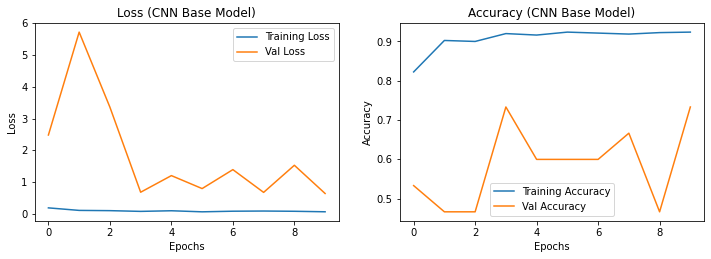

In [87]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss (CNN Base Model)')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy (CNN Base Model)')
plt.savefig("./Img/cnn_base_loss_acc.png")


### III. Evaluate CNN base model's performance on Test set

In [129]:
'''Model evaluation for Train set'''
evaluation = model.evaluate(train_generator)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")


652/652 [==============================] - 75s 115ms/step - loss: 0.1335 - accuracy: 0.9507
Train Accuracy: 95.07%


In [121]:
'''Model evaluation for Test set'''
evaluation = model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")


624/624 [==============================] - 7s 12ms/step - loss: 0.4686 - accuracy: 0.7740
Test Accuracy: 77.40%


### IV. Prediciton from CNN base model for Test set

In [88]:
'''CNN base model prediction for Test set'''
y_pred = model.predict(test_generator)

In [89]:
y_pred_class= model.predict_classes(test_generator)
y_pred_class=y_pred_class.reshape(1,-1)[0]

In [47]:
test_generator.classes
#y_pred_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

### V. Calculate Confusion Matrix and Classification Report

In [91]:
'''Calculate Confusion Maatrix ad Classification report'''
from sklearn.metrics import confusion_matrix, classification_report

cm= confusion_matrix(test_generator.classes, y_pred_class )
print(cm)
pd.DataFrame(classification_report(test_generator.classes, y_pred_class , output_dict=True, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

[[106 128]
 [ 13 377]]


,Pneumonia (Class 0),Normal (Class 1),accuracy,macro avg,weighted avg
precision,0.890756,0.746535,0.774038,0.818645,0.800618
recall,0.452991,0.966667,0.774038,0.709829,0.774038
f1-score,0.600567,0.842458,0.774038,0.721512,0.751749
support,234.000000,390.000000,0.774038,624.000000,624.000000


### VI. Plot Confusion Matrix

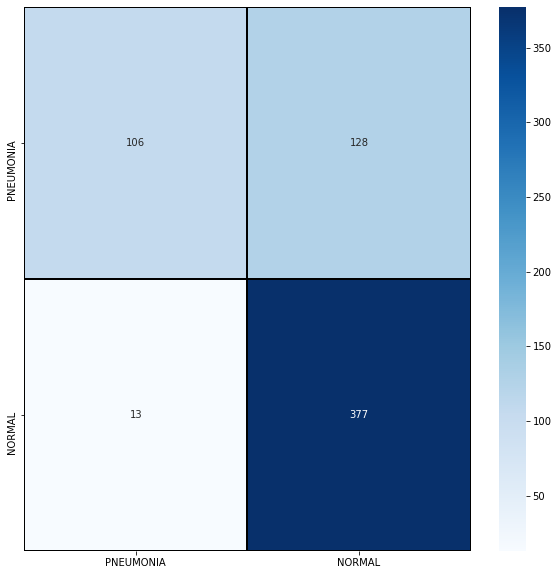

In [92]:
'''Plotting Confusing Matrix'''
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)
plt.savefig('./Img/confusion_mat_cnn_base_pred.png')

# Part II : Transfer Learning using VGG19

   ### I. Load pre-trained VGG19 model 

In [94]:
'''Load pre-trained VGG19 model'''
from keras.applications import VGG19
'''using pre-trained weight'''
vgg19_base_model = VGG19(input_shape=(img_size,img_size,3),include_top=False,weights='imagenet')
'''using only model architecture, NO pre-trained weight'''
#vgg19_base_model = VGG19(input_shape=(img_size,img_size,3),include_top=False,weights=None)

'using only model architecture, NO pre-trained weight'

In [95]:
vgg19_base_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

   ### II. Use pre-trained VGG19 model and customize few output layers

In [96]:
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D


vgg19_model = Sequential([
        vgg19_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(32,activation="relu"),
        BatchNormalization(),
        Dropout(0.2),
        Dense(1,activation="sigmoid")
    ])

In [97]:
from keras.optimizers import Adam
from keras.metrics import Precision, Recall

adam_opt = Adam(learning_rate=0.0001)
METRICS = ['accuracy',
            Precision(name='precision'),
            Recall(name='recall')]
vgg19_model.compile(optimizer=adam_opt,loss='binary_crossentropy',metrics=METRICS)

### III. Train the VGG19 model

In [98]:
'''Train the VGG19 model''' 
history_tl = vgg19_model.fit(train_generator,
              epochs= 10,
              validation_data=validation_generator,
              class_weight=class_weight,
              steps_per_epoch=100,
              validation_steps=15)

Epoch 1/10
100/100 [==============================] - 136s 1s/step - loss: 0.3237 - accuracy: 0.5000 - precision: 0.7143 - recall: 0.5113 - val_loss: 0.9787 - val_accuracy: 0.5333 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 2/10
100/100 [==============================] - 141s 1s/step - loss: 0.2954 - accuracy: 0.5462 - precision: 0.7902 - recall: 0.5391 - val_loss: 1.7619 - val_accuracy: 0.5333 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
100/100 [==============================] - 143s 1s/step - loss: 0.2574 - accuracy: 0.6175 - precision: 0.8408 - recall: 0.5828 - val_loss: 1.2830 - val_accuracy: 0.5333 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
100/100 [==============================] - 143s 1s/step - loss: 0.2216 - accuracy: 0.6475 - precision: 0.8936 - recall: 0.6017 - val_loss: 7.1812 - val_accuracy: 0.5333 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 5/10
100/100 [==============================] - 144s 1s/step - loss: 0.2037 - 

### IV. Evaluate VGG19 tranfer learning model's performance for Test set

In [126]:
'''VGG19 Tranfer Learning Model evaluation for Train set'''
evaluation_vgg19 = vgg19_model.evaluate(train_generator)
print(f"Train Accuracy: {evaluation_vgg19[1] * 100:.2f}%")

652/652 [==============================] - 307s 472ms/step - loss: 0.3658 - accuracy: 0.8422 - precision: 0.9796 - recall: 0.8044
Train Accuracy: 84.22%


In [122]:
'''VGG19 Tranfer Learning Model evaluation for Test set'''
evaluation_vgg19 = vgg19_model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation_vgg19[1] * 100:.2f}%")

624/624 [==============================] - 29s 47ms/step - loss: 1.0189 - accuracy: 0.6522 - precision: 0.6459 - recall: 0.9821
Test Accuracy: 65.22%


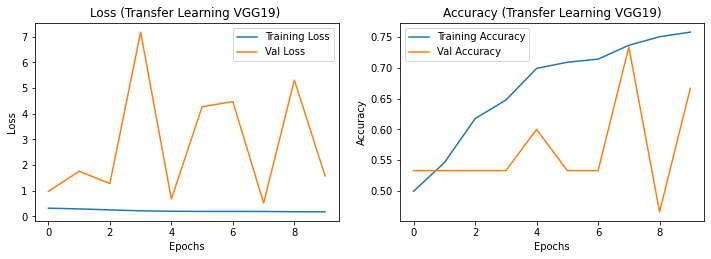

In [99]:
'''Plot Loss and Accuracy '''
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history_tl.history['loss'], label='Training Loss')
plt.plot(history_tl.history['val_loss'], label='Val Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss (Transfer Learning VGG19) ')

plt.subplot(2, 2, 2)
plt.plot(history_tl.history['accuracy'], label='Training Accuracy')
plt.plot(history_tl.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy (Transfer Learning VGG19)')
plt.savefig("./Img/vga19_loss_acc.png")

In [100]:
'''Save VGG19 Model'''
dir_model='./models'
if not os.path.exists(dir_model):
    os.mkdir(dir_model)

model.save('./models/vgg19_model.h5')


### V. VGG19 tranfer learning model prediction

In [101]:
'''VGG19 tranfer learning model prediction'''
y_pred_vgg19 = vgg19_model.predict_classes(test_generator)

In [71]:
y_pred_vgg19

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

### VI. Calculate Confusion Matrix and Classification Report

In [104]:
'''Calculate Confusion Matrix'''
cm= confusion_matrix(test_generator.classes, y_pred_vgg19 )
print(cm)

[[ 24 210]
 [  7 383]]


In [105]:
'''Calculate Classification Report'''
pd.DataFrame(classification_report(test_generator.classes, y_pred_vgg19 , output_dict=True, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

,Pneumonia (Class 0),Normal (Class 1),accuracy,macro avg,weighted avg
precision,0.774194,0.645868,0.652244,0.710031,0.693990
recall,0.102564,0.982051,0.652244,0.542308,0.652244
f1-score,0.181132,0.779247,0.652244,0.480190,0.554954
support,234.000000,390.000000,0.652244,624.000000,624.000000


### VII. Plot Confusion matrix

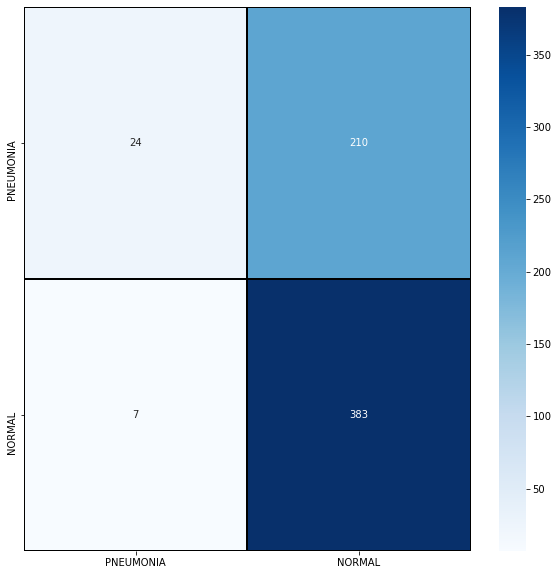

In [107]:
'''Plot Confusion matrix'''
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)
plt.savefig('./Img/confusion_mat_vgg19_pred.png')

# Part III Transfer Learning using ResNet152 Model

### I. Load and train ResNet152 model

In [108]:
'''Load pre-trained ResNet152 Model'''
from keras.applications import ResNet152

resnet_base_model = ResNet152(input_shape=(img_size,img_size,3), include_top=False, weights='imagenet')

In [109]:
'''YOu get an error if h5py versin is >= 3'''
import sys
!{sys.executable} -m pip show h5py


Name: h5py
Version: 2.7.0
Summary: Read and write HDF5 files from Python
Home-page: http://www.h5py.org
Author: Andrew Collette
Author-email: andrew.collette@gmail.com
License: UNKNOWN
Location: /Users/anup/anaconda3/lib/python3.8/site-packages
Requires: numpy, six
Required-by: tensorflow, Keras, hexrd


### II. Customize few output layers

In [110]:
'''Customize few output layers'''
resnet_model = Sequential([
        resnet_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(32,activation="relu"),
        BatchNormalization(),
        Dropout(0.2),
        Dense(1,activation="sigmoid")
    ])

In [111]:
adam_opt = Adam(learning_rate=0.0001)
METRICS = ['accuracy',
            Precision(name='precision'),
            Recall(name='recall')]
resnet_model.compile(optimizer=adam_opt,loss='binary_crossentropy',metrics=METRICS)

### III. Train ResNet152 Transfer Learning Model

In [112]:
'''Train the ResnNet152 transfer learning model'''
history_rsnet = resnet_model.fit(train_generator,
              epochs= 10,
              validation_data=validation_generator,
              class_weight=class_weight,
              steps_per_epoch=100,
              validation_steps=15)

Epoch 1/10
100/100 [==============================] - 147s 1s/step - loss: 0.2890 - accuracy: 0.5600 - precision: 0.8103 - recall: 0.5447 - val_loss: 0.8281 - val_accuracy: 0.5333 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 2/10
100/100 [==============================] - 151s 2s/step - loss: 0.2370 - accuracy: 0.6550 - precision: 0.9036 - recall: 0.6137 - val_loss: 3.6308 - val_accuracy: 0.4667 - val_precision: 0.4667 - val_recall: 1.0000
Epoch 3/10
100/100 [==============================] - 155s 2s/step - loss: 0.1933 - accuracy: 0.7200 - precision: 0.9434 - recall: 0.6667 - val_loss: 6.3022 - val_accuracy: 0.4667 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
100/100 [==============================] - 154s 2s/step - loss: 0.1751 - accuracy: 0.7575 - precision: 0.9424 - recall: 0.7167 - val_loss: 3.5604 - val_accuracy: 0.5333 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/10
100/100 [==============================] - 160s 2s/step - loss: 0.1408 - 

### IV. Evaluate ResNet152 Transfer Learning Model's performance for Test set

In [127]:
'''ResNet152 Transfer Learning Model evaluation for Train set'''
evaluation_rn = resnet_model.evaluate(train_generator)
print(f"Train Accuracy: {evaluation_rn[1] * 100:.2f}%")

652/652 [==============================] - 305s 468ms/step - loss: 0.2246 - accuracy: 0.9214 - precision: 0.9140 - recall: 0.9871
Train Accuracy: 92.14%


In [128]:
'''ResNet152 Transfer Learning Model evaluation for Test set'''
evaluation_rn = resnet_model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation_rn[1] * 100:.2f}%")

624/624 [==============================] - 81s 130ms/step - loss: 0.3879 - accuracy: 0.8526 - precision: 0.8326 - recall: 0.9564
Test Accuracy: 85.26%


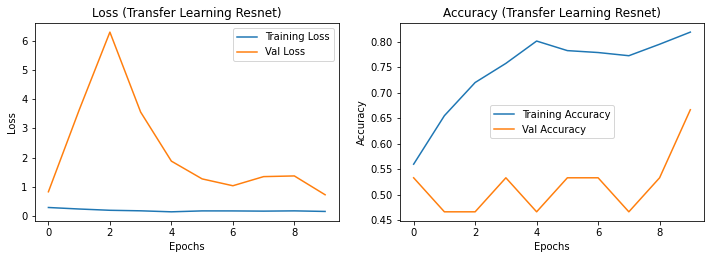

In [114]:
'''Plot Loss and Accuracy for ResNet152 Transfer Learning model'''
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history_rsnet.history['loss'], label='Training Loss')
plt.plot(history_rsnet.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss (Transfer Learning Resnet)')

plt.subplot(2, 2, 2)
plt.plot(history_rsnet.history['accuracy'], label='Training Accuracy')
plt.plot(history_rsnet.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy (Transfer Learning Resnet)')
plt.savefig("./Img/resnet152_loss_acc.png")


In [115]:
'''Save ResNet152 Model'''
dir_model='./models'
if not os.path.exists(dir_model):
    os.mkdir(dir_model)

model.save('./models/resnet152_model.h5')


### V. Prediction of ResNet152 Transfer Learning Model

In [116]:
'''ResNet152 Transfer Learning Model Prediction'''
y_pred_resnet = resnet_model.predict_classes(test_generator)

### VI. Calculate Confusion Matrix and Classification Report

In [118]:
'''Calculate Confusion Matrix and Classification Report'''
cm= confusion_matrix(test_generator.classes, y_pred_resnet )
print(cm)
pd.DataFrame(classification_report(test_generator.classes, y_pred_resnet , output_dict=True, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

[[159  75]
 [ 17 373]]


,Pneumonia (Class 0),Normal (Class 1),accuracy,macro avg,weighted avg
precision,0.903409,0.832589,0.852564,0.867999,0.859147
recall,0.679487,0.956410,0.852564,0.817949,0.852564
f1-score,0.775610,0.890215,0.852564,0.832912,0.847238
support,234.000000,390.000000,0.852564,624.000000,624.000000


### VII. Plot Confusion Matrtix

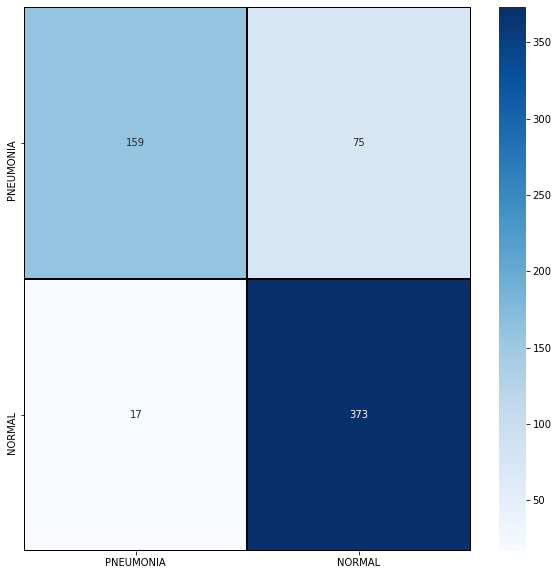

In [120]:
'''Plot Confusion Matrix'''
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)
plt.savefig('./Img/confusion_mat_resnet152_pred.png')